In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json /content

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:45<00:00, 21.5MB/s]
100% 1.03G/1.03G [00:45<00:00, 24.1MB/s]


https://link.springer.com/chapter/10.1007/978-981-16-7996-4_11


In [ ]:
! kaggle datasets download -d ahmedkhanak1995/sign-language-gesture-images-dataset

 90% 171M/191M [00:01<00:00, 145MB/s]
100% 191M/191M [00:01<00:00, 151MB/s]


In [ ]:
!cp /content/kaggle.json /content/drive/MyDrive/kaggle.json

In [ ]:
from zipfile import ZipFile

# specifying the zip file name
# file_name = "asl-signs.zip"
file_name = "asl-alphabet.zip"
# file_name = "sign-language-gesture-images-dataset.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    # zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')


Extracting all the files now...
Done!


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p "/content/drive/My Drive/TEST"

In [ ]:
!cp -r  "/content/drive/MyDrive/TEST" "/content/asl_alphabet_train"

In [ ]:
pip install -U keras-tuner

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from tensorflow import keras

In [ ]:
print(os.getcwd())
print(os.listdir())


/content
['.config', 'asl_alphabet_test', 'asl-alphabet.zip', 'asl_alphabet_train', 'drive', 'kaggle.json', 'best_so_far19th.h5', 'sample_data']


In [ ]:
# os.chdir("/content/asl_alphabet_train/asl_alphabet_train")
os.chdir("/content/Gesture Image Data")
print(os.listdir())

In [ ]:
print(len(os.listdir()))


37


In [ ]:
l = [chr(i) for i in range(65,65+26)]
# l.append("del")
# l.append("nothing")
l = l + [i for i in range(0,10)]
l.append("space")
print(round(len(l)/3))
print(len(l))

12
37


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(200, 200,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(29, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
pip install keras-tuner


In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  # hp_units = hp.Int('units', min_value=32, max_value=256, step=64)
  hp_dense_layers = hp.Int('dense_layers', min_value=2, max_value=5)
  hp_conv_layers = hp.Int('conv_layers', min_value=2, max_value=5)

  for i in range(hp_conv_layers):
        # hp_filters = hp.Int('filters', min_value=32, max_value=128, step=64)
        # model.add(keras.layers.Conv2D(filters=hp_filters, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
        model.add(keras.layers.Conv2D(hp.Choice(f"layers_{i}_filters", [16,32,64,128]) , kernel_size=(3, 3) , activation = 'relu',input_shape=(200, 200, 1)))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  # model.add(keras.layers.Conv2D(hp.Choice(f"layers_{i}_filters", [16,32,64]) , 3 , activation = 'relu'))
  model.add(keras.layers.Flatten())


  for i in range(hp_dense_layers):
      # model.add(keras.layers.Dense(units=hp_units, activation='relu'))
      model.add(keras.layers.Dense(hp.Choice("Dense layer" , [64 , 128 , 256 , 512 , 1024]) , activation = 'relu'))
      model.add(keras.layers.Dropout(0.5))


  model.add(keras.layers.Dense(29, activation='softmax'))

  model.compile(optimizer = 'adam',
                loss = keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'])
  return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     directory='tuner_results',
#     project_name='sign_language_detection'
# )

In [ ]:
def nn(l):
  res = []
  for i in range(3):
    if np.isnan(l[i]).all():
      res.append(i)
  return res

def find_none_indices(l):
    return [index for index, item in enumerate(l) if item is None]


Main Training Model

In [ ]:
import os
import cv2
import random
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle

os.chdir("/content/asl_alphabet_train/asl_alphabet_train")
ff = os.getcwd()
k = 0
count  =1
done = []
while k <= 8:
    l1 = l
    imageArr = []
    labelArr = []

    for i in l1:
        os.chdir(os.path.join(ff, i))
        l2 = os.listdir()
        l2 = list(set(l2) - set(done))
        random.shuffle(l2)
        print(f"Collecting: {i}")
        for j in range(round((len(l2) * 70) / 800)):
            g = cv2.imread(l2[j], cv2.IMREAD_GRAYSCALE)
            if l2[j][0] in l:
              imageArr.append(g)
              labelArr.append(ord(l2[j][0]) - 65)
              done.append(l2[j])
            else:
              if l2[j][0] == "d":
                imageArr.append(g)
                labelArr.append(26)
              elif l2[j][0] == "s":
                imageArr.append(g)
                labelArr.append(27)
              elif l2[j][0] == "n":
                imageArr.append(g)
                labelArr.append(28)
    # res = np.where(imageArr == 0)[0]
    res = find_none_indices(imageArr)
    print(len(imageArr))
    print(res)
    for i in res:
      # imageArr = np.delete(imageArr,i)
      # labelArr = np.delete(labelArr,i)
      imageArr = imageArr.pop(i)
      labelArr = labelArr.pop(i)
    # print(np.concatenate(imageArr1).reshape(len(imageArr1),200,200,1).shape)
    # print(len(imageArr))
    imageArr = np.stack(imageArr).reshape(len(imageArr),200,200,1)
    labelArr = np.array([labelArr]).reshape(len(labelArr),)
    # print(imageArr.shape)
    # print(labelArr.shape)
    # temp = list(zip(imageArr, labelArr))
    # print(imageArr1.shape)
    # print(labelArr.shape)
    imageArr, labelArr = shuffle(imageArr, labelArr)
    # print(imageArr.shape)
    # print(labelArr.shape)
    # random.shuffle(temp)
    # imageArr, labelArr = zip(*temp)
    # imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
    # labelArr = np.array(list(labelArr))
    # imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
    # labelArr = np.asarray(list(labelArr))
    print(f"Training: ")
    # num_classes = 26  # Number of classes in your problem
    # labelArr = keras.utils.to_categorical(labelArr, num_classes)
    print(f"batch : {count}")
    # model.fit(imageArr, labelArr, epochs=10, batch_size=32)
    checkpoint = ModelCheckpoint('model_checkpoint.h5', monitor='val_loss', save_best_only=True)
    model.fit(imageArr, labelArr, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint])
    count+=1
    k += 1


In [ ]:
# print(len(labelArr))
print(len(imageArr))
# print(np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1).shape)
print(type(imageArr[0]))
# print(type(labelArr))
print(labelArr.shape)
print(imageArr.shape)

In [ ]:
# imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
# labelArr = np.asarray(list(labelArr))
res = np.where(imageArr == 0)[0]
for i in res:
  imageArr1 = np.delete(imageArr,i)
  labelArr1 = np.delete(labelArr,i)
print(imageArr[6585])
print(chr(labelArr[6585]+65))
print(np.stack(imageArr1).reshape(len(imageArr1),200,200,1))

None
m
(7598, 200, 200, 1)


0

In [ ]:
from random import randint
for i in range(1,21):
  # n = randint(0,200)
  plt.subplot(5,4,i)
  # print(chr(labelArr[i]+65))
  plt.imshow(imageArr[i])
  plt.xlabel(chr(labelArr[i]+65))
  plt.figure(i+1)
plt.show()


In [ ]:
os.chdir("/content/asl_alphabet_test/asl_alphabet_test")

Tets data collection

In [ ]:

yut = os.listdir()
vali = []
vall = []
for i in yut:
   g = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
   if i[0] in l:
              vali.append(g)
              vall.append(ord(i[0]) - 65)
   else:
              if i[0] == "d":
                vali.append(g)
                vall.append(26)
              elif i[0] == "s":
                vali.append(g)
                vall.append(27)
              elif i[0] == "n":
                vali.append(g)
                vall.append(28)


In [ ]:
from sklearn.utils import shuffle
res = find_none_indices(vali)
print(len(vali))
print(res)
for i in res:
      # imageArr = np.delete(imageArr,i)
      # labelArr = np.delete(labelArr,i)
      vali = vali.pop(i)
      vall = vall.pop(i)

vali = np.stack(vali).reshape(len(vali),200,200,1)
vall = np.array([vall]).reshape(len(vall),)
vali, vall = shuffle(vali, vall)
# print(vali)

28
[]


In [ ]:
vali[0].shape

(200, 200, 1)

Hypertuning Model


In [ ]:
import os
import cv2
import random
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
tun  = []
os.chdir("/content/asl_alphabet_train/asl_alphabet_train")
ff = os.getcwd()
k = 0
count  =1
done = []
# while k <= 6:
l1 = l
imageArr = []
labelArr = []

for i in l1:
        os.chdir(os.path.join(ff, i))
        l2 = os.listdir()
        l2 = list(set(l2) - set(done))
        random.shuffle(l2)
        print(f"Collecting: {i}")
        # print(f"len l2 : {len(l2)}")
        # print(f"{int((len(l2) * 70)/100)}-{int(len(l2)/1.33333)} = {int((len(l2) * 70)/100)-int(len(l2)/1.33333)}")
        # for j in range(int((len(l2) * 70)/100),int(len(l2)/1.33333)):
        for j in range(int((len(l2) * 84)/100),len(l2)):
            g = cv2.imread(l2[j], cv2.IMREAD_GRAYSCALE)
            if l2[j][0] in l:
              imageArr.append(g)
              labelArr.append(ord(l2[j][0]) - 65)
              done.append(l2[j])
            else:
              if l2[j][0] == "d":
                imageArr.append(g)
                labelArr.append(26)
              elif l2[j][0] == "s":
                imageArr.append(g)
                labelArr.append(27)
              elif l2[j][0] == "n":
                imageArr.append(g)
                labelArr.append(28)

    # res = np.where(imageArr == 0)[0]
res = find_none_indices(imageArr)
print(len(imageArr))
print(res)
for i in res:
      # imageArr = np.delete(imageArr,i)
      # labelArr = np.delete(labelArr,i)
      imageArr = imageArr.pop(i)
      labelArr = labelArr.pop(i)
    # print(np.concatenate(imageArr1).reshape(len(imageArr1),200,200,1).shape)
    # print(len(imageArr))
imageArr = np.stack(imageArr).reshape(len(imageArr),200,200,1)
labelArr = np.array([labelArr]).reshape(len(labelArr),)
    # print(imageArr.shape)
    # print(labelArr.shape)
    # temp = list(zip(imageArr, labelArr))
    # print(imageArr1.shape)
    # print(labelArr.shape)
imageArr, labelArr = shuffle(imageArr, labelArr)
    # print(imageArr.shape)
    # print(labelArr.shape)
    # random.shuffle(temp)
    # imageArr, labelArr = zip(*temp)
    # imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
    # labelArr = np.array(list(labelArr))
    # imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
    # labelArr = np.asarray(list(labelArr))
    # print(len(imageArr))
    # print(len(labelArr))
print(f"Training: ")
    # num_classes = 26  # Number of classes in your problem
    # labelArr = keras.utils.to_categorical(labelArr, num_classes)
print(f"batch : {count}")
    # model.fit(imageArr, labelArr, epochs=10, batch_size=32)
    # checkpoint = ModelCheckpoint('model_checkpoint.h5', monitor='val_loss', save_best_only=True)
    # model.fit(imageArr, labelArr, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint])


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    directory='tuner_results',
    project_name='sign_language_detection'
          )
tuner.search(x=imageArr[:int(len(imageArr)*0.7)], y=labelArr[:int(len(imageArr)*0.7)],
             validation_data=(imageArr[int(len(imageArr)*0.7):], labelArr[int(len(imageArr)*0.7):]),
             epochs=10,
             batch_size=32)
  # tun.append(tuner)
    # count+=1
    # k += 1


Trial 50 Complete [00h 19m 24s]
val_accuracy: 0.6796743869781494

Best val_accuracy So Far: 0.8348096609115601
Total elapsed time: 01h 43m 35s


In [ ]:
best_model = tuner.get_best_models()[0]

NameError: ignored

In [ ]:
model.evaluate(vali,vall)

1/1 [==============================] - 1s 641ms/step - loss: 0.0023 - accuracy: 1.0000


[0.002314492594450712, 1.0]

In [ ]:
best_model.summary()

In [ ]:
tuner.results_summary()

Results summary
Results in tuner_results/sign_language_detection
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 28 summary
Hyperparameters:
filters: 96
units: 160
dense_layers: 3
conv_layers: 3
layers_0_filters: 16
layers_1_filters: 32
layers_2_filters: 128
layers_3_filters: 16
Dense layer: 1024
Score: 0.8348096609115601

Trial 32 summary
Hyperparameters:
filters: 32
units: 32
dense_layers: 3
conv_layers: 4
layers_0_filters: 128
layers_1_filters: 32
layers_2_filters: 32
layers_3_filters: 32
Dense layer: 1024
Score: 0.8228393793106079

Trial 48 summary
Hyperparameters:
filters: 96
units: 32
dense_layers: 3
conv_layers: 2
layers_0_filters: 16
layers_1_filters: 64
layers_2_filters: 128
layers_3_filters: 128
Dense layer: 512
Score: 0.7888436913490295

Trial 43 summary
Hyperparameters:
filters: 96
units: 96
dense_layers: 3
conv_layers: 3
layers_0_filters: 16
layers_1_filters: 32
layers_2_filters: 32
layers_3_filters: 64
Dense layer: 1024
Score: 0.7838161587715

In [ ]:
type(tuner)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(200, 200,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(29, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=320, activation='relu'))
model.add(keras.layers.Dense(units=320, activation='relu'))
model.add(keras.layers.Dense(units=320, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(29, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [ ]:
import os
import cv2
import random
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
hist = []
os.chdir("/content/asl_alphabet_train/asl_alphabet_train")
ff = os.getcwd()
k = 0
count  =1
done = []
while k <= 8:
    l1 = l
    imageArr = []
    labelArr = []

    for i in l1:
        os.chdir(os.path.join(ff, i))
        l2 = os.listdir()
        l2 = list(set(l2) - set(done))
        random.shuffle(l2)
        print(f"Collecting: {i}")
        for j in range(round((len(l2) * 70) / 800)):
            g = cv2.imread(l2[j], cv2.IMREAD_GRAYSCALE)
            if l2[j][0] in l:
              imageArr.append(g)
              labelArr.append(ord(l2[j][0]) - 65)
              done.append(l2[j])
            else:
              if l2[j][0] == "d":
                imageArr.append(g)
                labelArr.append(26)
              elif l2[j][0] == "s":
                imageArr.append(g)
                labelArr.append(27)
              elif l2[j][0] == "n":
                imageArr.append(g)
                labelArr.append(28)
    # res = np.where(imageArr == 0)[0]
    res = find_none_indices(imageArr)
    print(len(imageArr))
    print(res)
    for i in res:
      # imageArr = np.delete(imageArr,i)
      # labelArr = np.delete(labelArr,i)
      imageArr = imageArr.pop(i)
      labelArr = labelArr.pop(i)
    # print(np.concatenate(imageArr1).reshape(len(imageArr1),200,200,1).shape)
    # print(len(imageArr))
    imageArr = np.stack(imageArr).reshape(len(imageArr),200,200,1)
    labelArr = np.array([labelArr]).reshape(len(labelArr),)
    # print(imageArr.shape)
    # print(labelArr.shape)
    # temp = list(zip(imageArr, labelArr))
    # print(imageArr1.shape)
    # print(labelArr.shape)
    imageArr, labelArr = shuffle(imageArr, labelArr)
    # print(imageArr.shape)
    # print(labelArr.shape)
    # random.shuffle(temp)
    # imageArr, labelArr = zip(*temp)
    # imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
    # labelArr = np.array(list(labelArr))
    # imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
    # labelArr = np.asarray(list(labelArr))
    print(f"Training: ")
    # num_classes = 26  # Number of classes in your problem
    # labelArr = keras.utils.to_categorical(labelArr, num_classes)
    print(f"batch : {count}")
    # model.fit(imageArr, labelArr, epochs=10, batch_size=32)
    checkpoint = ModelCheckpoint('model_checkpoint.h5', monitor='val_loss', save_best_only=True)
    histi = model.fit(imageArr, labelArr, epochs=10, batch_size=32, validation_split=0.2, callbacks=[checkpoint])
    hist.append(histi)
    count+=1
    k += 1


NameError: ignored

In [ ]:
l1 = [chr(i) for i in range(65,65+26)]
l1.append("del")
l1.append("nothing")
l1.append("space")
l1
l = l1

In [ ]:
import os
import cv2
import random
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
hist = []
os.chdir("/content/asl_alphabet_train/asl_alphabet_train")
ff = os.getcwd()
k = 0
count  =1
done = []
while k <= 8:
    imageArr = []
    labelArr = []

    for i in l1:
        os.chdir(os.path.join(ff, str(i)))
        l2 = os.listdir()
        random.shuffle(l2)
        print(f"Collecting: {i}")
        for j in range(round((len(l2) * 70) /500)):
            g = cv2.imread(l2[j], cv2.IMREAD_GRAYSCALE)
            if l2[j][0] in l:
              imageArr.append(g)
              labelArr.append(ord(l2[j][0]) - 65)
              done.append(l2[j])
            else:
              if l2[j][0] == "d":
                imageArr.append(g)
                labelArr.append(26)
              elif l2[j][0] == "s":
                imageArr.append(g)
                labelArr.append(27)
              elif l2[j][0] == "n":
                imageArr.append(g)
                labelArr.append(28)
    # res = np.where(imageArr == 0)[0]
    res = find_none_indices(imageArr)
    print(len(imageArr))
    print(res)
    for i in res:
      # imageArr = np.delete(imageArr,i)
      # labelArr = np.delete(labelArr,i)
      imageArr = imageArr.pop(i)
      labelArr = labelArr.pop(i)
    # print(np.concatenate(imageArr1).reshape(len(imageArr1),200,200,1).shape)
    # print(len(imageArr))
    imageArr = np.stack(imageArr).reshape(len(imageArr),200,200,1)
    labelArr = np.array([labelArr]).reshape(len(labelArr),)
    # print(imageArr.shape)
    # print(labelArr.shape)
    # temp = list(zip(imageArr, labelArr))
    # print(imageArr1.shape)
    # print(labelArr.shape)
    imageArr, labelArr = shuffle(imageArr, labelArr)
    # print(imageArr.shape)
    # print(labelArr.shape)
    # random.shuffle(temp)
    # imageArr, labelArr = zip(*temp)
    # imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
    # labelArr = np.array(list(labelArr))
    # imageArr = np.asarray(list(imageArr)).reshape(len(imageArr), 200, 200, 1)
    # labelArr = np.asarray(list(labelArr))
    print(f"Training: ")
    # num_classes = 26  # Number of classes in your problem
    # labelArr = keras.utils.to_categorical(labelArr, num_classes)
    print(f"batch : {count}")
    # model.fit(imageArr, labelArr, epochs=10, batch_size=32)
    checkpoint = ModelCheckpoint('model_checkpoint.h5', monitor='val_loss', save_best_only=True)
    histi = model.fit(imageArr, labelArr, epochs=25, batch_size=32, validation_split=0.2)
    hist.append(histi)
    count+=1
    k += 8


Collecting: A
Collecting: B
Collecting: C
Collecting: D
Collecting: E
Collecting: F
Collecting: G
Collecting: H
Collecting: I
Collecting: J
Collecting: K
Collecting: L
Collecting: M
Collecting: N
Collecting: O
Collecting: P
Collecting: Q
Collecting: R
Collecting: S
Collecting: T
Collecting: U
Collecting: V
Collecting: W
Collecting: X
Collecting: Y
Collecting: Z
Collecting: del
Collecting: nothing
Collecting: space
12180
[]
Training: 
batch : 1
Epoch 1/25
305/305 [==============================] - 12s 27ms/step - loss: 2.9774 - accuracy: 0.1343 - val_loss: 2.0960 - val_accuracy: 0.3247
Epoch 2/25
305/305 [==============================] - 8s 26ms/step - loss: 1.8325 - accuracy: 0.4123 - val_loss: 1.2738 - val_accuracy: 0.5956
Epoch 3/25
305/305 [==============================] - 8s 26ms/step - loss: 1.2063 - accuracy: 0.6063 - val_loss: 0.8782 - val_accuracy: 0.7077
Epoch 4/25
305/305 [==============================] - 8s 26ms/step - loss: 0.8001 - accuracy: 0.7272 - val_loss: 0.6915 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


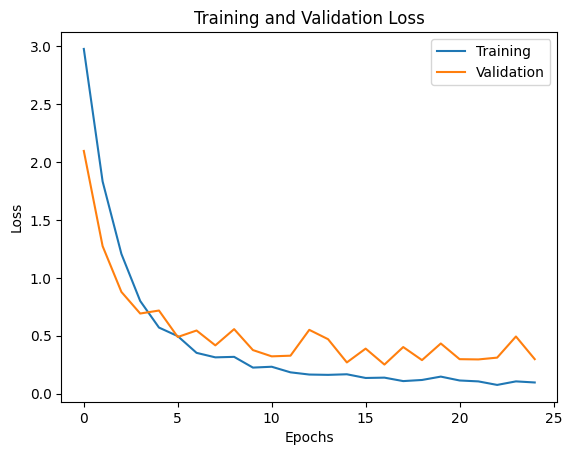

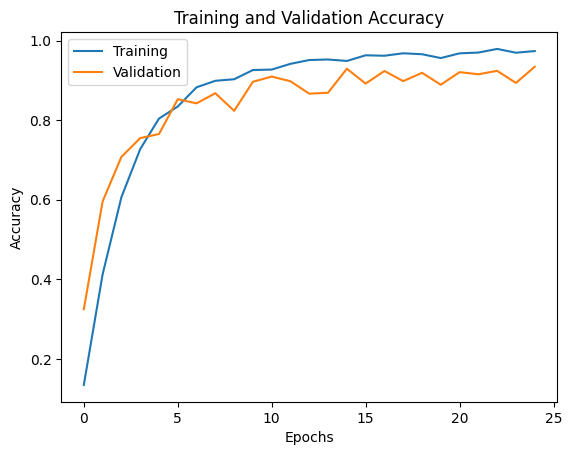

In [ ]:
import matplotlib.pyplot as plt
history = hist[0]
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
model.save("/content/best_so_far29.h5")

In [ ]:
os.chdir("/content/")

In [ ]:
os.listdir()

In [ ]:
!cp /content/best_so_far19th.h5 /content/drive/MyDrive/best_so_far19th.h5

In [ ]:
model = keras.models.load_model('/content/best_so_far19th.h5', compile=False)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model = best_model

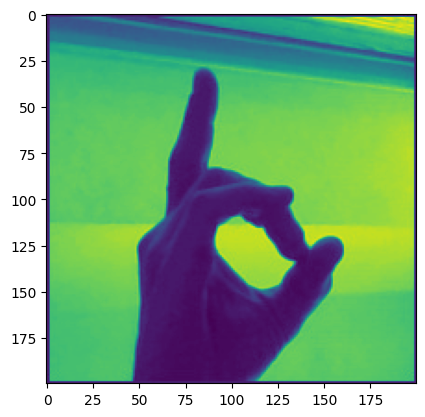

In [ ]:
plt.imshow(cv2.imread("/content/asl_alphabet_test/asl_alphabet_test/D_test.jpg", cv2.IMREAD_GRAYSCALE))

In [ ]:
g = cv2.imread("/content/asl_alphabet_test/asl_alphabet_test/D_test.jpg", cv2.IMREAD_GRAYSCALE).reshape(1,200,200)
g.shape

(1, 200, 200)

In [ ]:
t = model.predict(g)

1/1 [==============================] - 0s 277ms/step


In [ ]:
chr(np.argmax(t)+65)

'D'

In [ ]:
model  = keras.models.load_model("/content/best_so_far19th.h5")

In [ ]:
for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    filter,biases = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name,filter.shape)

layer number 0 conv2d (3, 3, 1, 32)
layer number 2 conv2d_1 (3, 3, 32, 32)
layer number 4 conv2d_2 (3, 3, 32, 32)
layer number 6 conv2d_3 (3, 3, 32, 32)
layer number 8 conv2d_4 (3, 3, 32, 32)


In [ ]:
filter,biases = model.layers[2].get_weights()
#Normalize
f_min,f_max = filter.min(),filter.max()
filter = (filter -f_min)/(f_max-f_min)

(3, 3, 32)
(3, 3, 32)
(3, 3, 32)
(3, 3, 32)
(3, 3, 32)
(3, 3, 32)


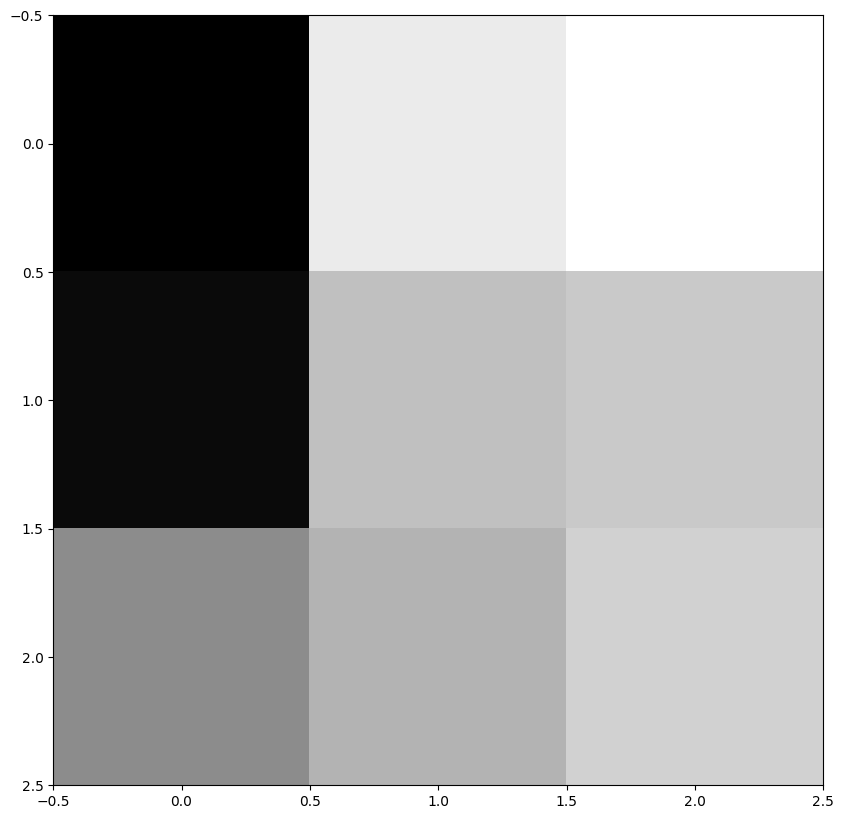

In [ ]:
from matplotlib import pyplot
n_filters = 6
ix = 1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    f = filter[:,:,:,i]
    print(f.shape)
    for j in range(32):
        pyplot.subplot(n_filters,3,ix)

        pyplot.imshow(f[:,:,j],cmap = 'gray')
        ix+=1
pyplot.show()

In [ ]:
model.input

<KerasTensor: shape=(None, 200, 200, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
g = cv2.imread("/content/asl_alphabet_test/asl_alphabet_test/D_test.jpg", cv2.IMREAD_GRAYSCALE).reshape(1,200,200)
g.shape

(1, 200, 200)

In [ ]:
model1 = keras.Model(inputs=model.inputs , outputs= model.layers[1].output)
px = model1.predict(g)

1/1 [==============================] - 0s 76ms/step


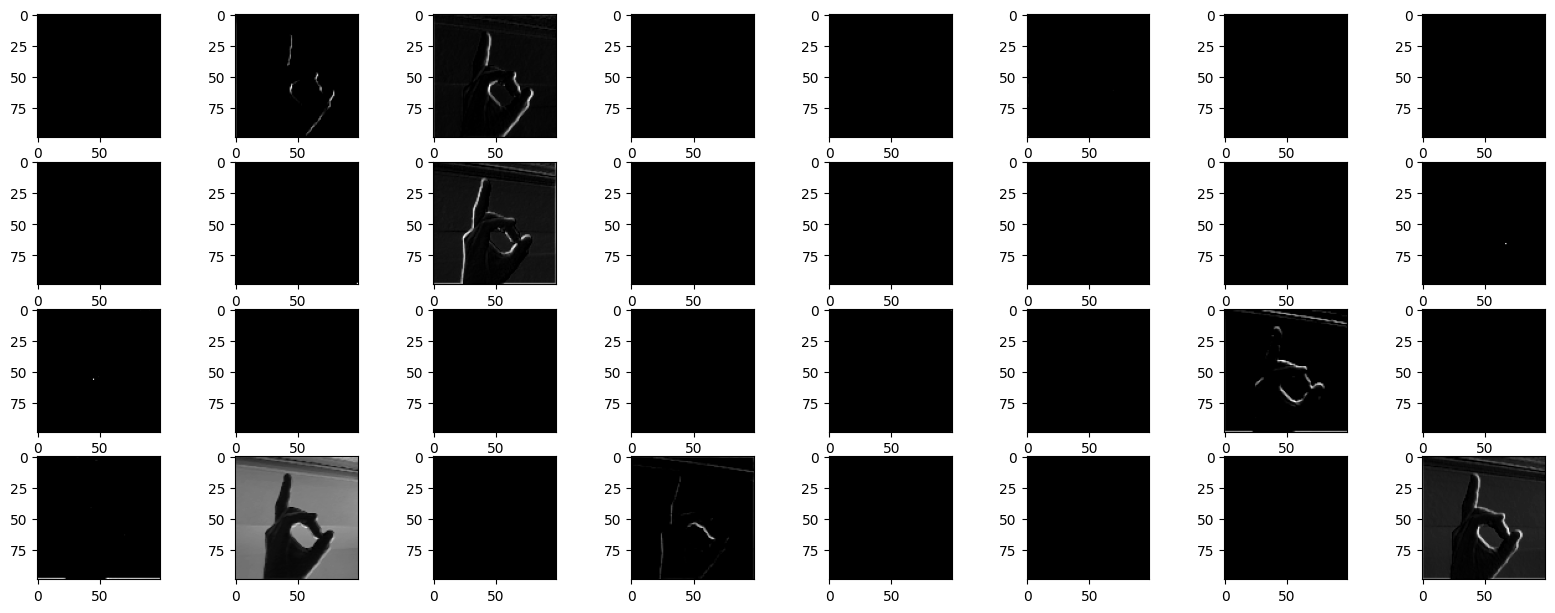

In [ ]:
from matplotlib import pyplot
fig = pyplot.figure(figsize = (20,15))
for i in range(1,px.shape[3]+1):
    pyplot.subplot(8,8,i)
    pyplot.imshow(px[0,:,:,i-1],cmap = 'gray')
pyplot.show()

In [ ]:
model.summary()

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename="construct_model", title="CNN — Model 1 — Simple Architecture")

In [ ]:
keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)